# Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

This notebook demonstrates Clustering
Outline:
- K-means clustering on the iris dataset. 
- Plot the clusters and Tuning Hyperparameters
- Visualizing cluster centers with each iteration
- K-means Clustering Clustering for Timeseries
- K-means Clustering with Dynamic Time Warping

## K-Means Clustering

doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

`sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=None)`

* *n_clusters*:int, default=8 \
The number of clusters to form as well as the number of centroids to generate.

* *init*: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’ \
Method for initialization: \
‘k-means++’ : selects initial cluster centers for k-mean clustering with a probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. \
‘random’: choose n_clusters observations at random from data for the initial centroids. \
If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers. \
If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization. \

* *n_init*: int, default=10 \
Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

* *max_iter*: int, default=300 \
Maximum number of iterations of the k-means algorithm for a single run.

* random_state: int, RandomState instance or None, default=None \
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.


**What is the difference between calling KMeans and any classifier we have implemented, using sklearn?**



In [ ]:
# Initialize k-means
k_means = KMeans(n_clusters=3, init='random')
# Fit the k-means by passing it the input
k_means.fit(X)
# Retrieve labels (cluster ids) for all the inputs
labels = k_means.labels_

In [ ]:
# One label (cluster id) for each point in training data
print (len(labels))
print (labels[0])
print (labels[80])
print (labels[139])

150
1
0
2


In [ ]:
print("iris dataset:",Counter(y))
print("cluster distribution",Counter(labels))

iris dataset: Counter({0: 50, 1: 50, 2: 50})
cluster distribution Counter({1: 152, 3: 143, 0: 119, 4: 80, 2: 8})


In [ ]:
# Sum of distances of samples to their closest cluster center -- within-cluster sum-of-squares criterion.
print (k_means.inertia_)
# Same as the cost function we have been discussing

78.851441426146


### Using k-means++

In [ ]:
# Initialize k-means
k_means = KMeans(n_clusters=3, init='k-means++') 
# Fit the k-means by passing it the input
k_means.fit(X)
# Retrieve labels (cluster ids) for all the inputs
labels = k_means.labels_

### Plotting the clusters in 3-D using Axes3D library

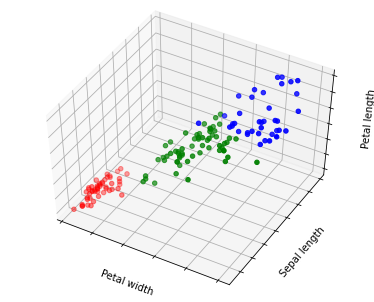

78.851441426146


In [ ]:
colors = ['red','green','blue','purple', 'black']
colors_1 = [colors[labels[i]] for i in range(len(labels))]

fig = plt.figure(1, figsize=(5, 4))
plt.clf()
# 'elev' stores the elevation angle in the z plane
ax = Axes3D(fig, elev=50)
plt.cla()#clear axes
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=colors_1)# Plotting just three columns, because we can't plot 4!
ax.w_xaxis.set_ticklabels([]) # Removes markings along the axes
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()
print (k_means.inertia_)

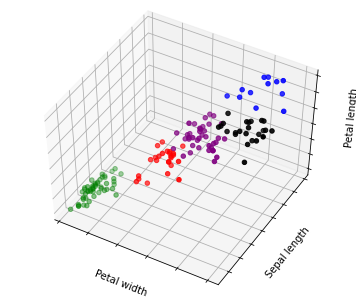

46.446182051282065


In [ ]:
# Change number of clusters to 5 and repeat
colors = ['red','green','blue','purple', 'black']

k_means = KMeans(n_clusters=5) 
k_means.fit(X)
labels = k_means.labels_
colors_1 = [colors[labels[i]] for i in range(len(labels))]
fig = plt.figure(1, figsize=(5, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50)#, azim=134)
plt.cla()
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=colors_1)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()
print (k_means.inertia_)

### Number of clusters v/s inertia

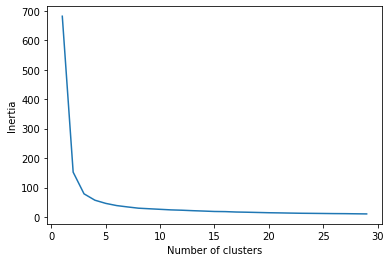

In [ ]:
plt.clf()
n_list = np.arange(1,30,1)
inertia = []
for n in n_list: 
    k_means = KMeans(n_clusters=n) 
    k_means.fit(X)
    inertia.append(k_means.inertia_)
plt.plot(n_list, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Elbow Method: See the elbow and decide that to be your value of 'K'

### The n_init parameter

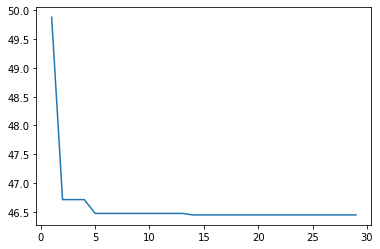

In [ ]:
# n_init = Number of time the k-means algorithm will be run 
# with different centroid seeds. The final results will be 
# the best output of n_init consecutive runs in terms of inertia.

plt.clf()
n_init_list = np.arange(1,30,1)
inertia = []
for n in n_init_list: 
    k_means = KMeans(n_clusters=5, n_init=n, init='random', random_state=5) 
    k_means.fit(X)
    inertia.append(k_means.inertia_)
plt.plot(n_init_list, inertia)
plt.show()

### Visualizing the Centers with iteration

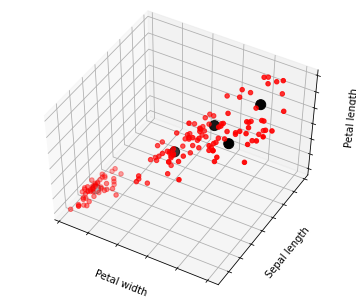

57.38042534602077


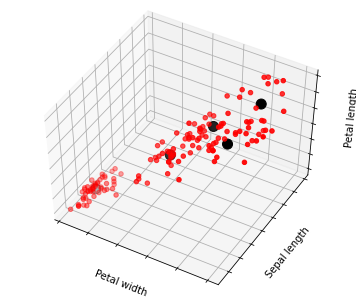

55.06536990293195


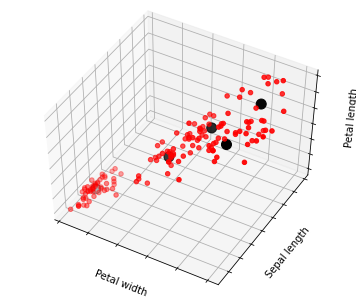

54.03430878801092


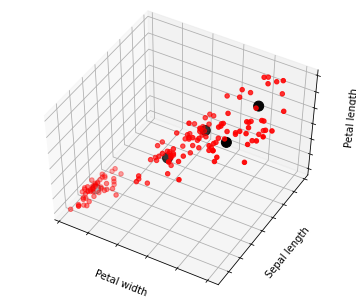

50.93666733258229


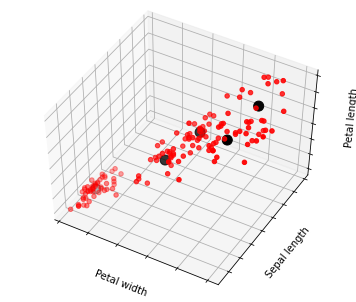

49.89596571428572


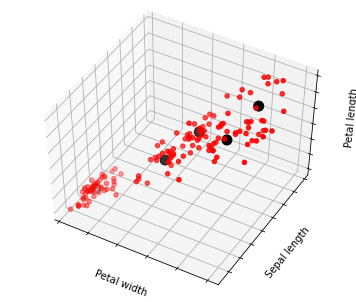

49.87999725274725


In [ ]:
for i in np.arange(1,7,1):
    k_means = KMeans(n_clusters=5, n_init=1, max_iter=i, init='random', random_state=5) 
    k_means.fit(X)
    labels = k_means.labels_
    colors_1 = [colors[labels[i]] for i in range(len(labels))]
    fig = plt.figure(1, figsize=(5, 4))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50)#, azim=134)
    plt.cla()
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c='red')
    ax.scatter(k_means.cluster_centers_[:,3], k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,2], c='black',s=100)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()
    print (k_means.inertia_)

## Timeseries Clustering

In [ ]:
!pip install yfinance &> /dev/null
!pip install tslearn &> /dev/null

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import bs4 as bs
import requests

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import defaultdict

In [ ]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [ ]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 
return_stocks = prices.apply(np.log).diff(1) # Daily Returns of the Stocks in the S&P500
return_stocks.dropna(inplace=True)
return_stocks = return_stocks.T

[*********************100%***********************]  502 of 502 completed


In [ ]:
return_stocks

Date,2022-01-20,2022-01-21,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-31,2022-02-01,2022-02-02,...,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-09
A,-0.006788,-0.014225,0.004426,-0.026038,-0.007908,-0.010693,0.036935,0.016355,0.012199,0.022506,...,-0.029327,-0.002207,0.028317,-0.014896,0.002512,0.023392,0.031366,-0.033410,-0.008798,-0.068091
AAL,-0.032289,-0.027830,0.006726,0.003042,-0.013456,-0.028734,-0.008912,0.051709,0.021623,0.007695,...,-0.062472,0.010599,0.023960,-0.034558,-0.011251,0.030249,0.025292,-0.056619,-0.038487,-0.089052
AAP,-0.021611,-0.013964,0.029024,-0.011361,-0.022228,-0.000044,0.013721,0.014313,0.014111,0.007975,...,-0.001923,0.006424,-0.071368,-0.047733,0.004299,-0.002847,0.037840,-0.030812,0.007571,-0.001085
AAPL,-0.010401,-0.012847,-0.004876,-0.011450,-0.000563,-0.002948,0.067451,0.025790,-0.000973,0.007020,...,-0.038043,-0.001468,0.044166,-0.037292,0.001965,0.009577,0.040190,-0.057328,0.003248,-0.033752
ABBV,-0.016255,-0.007924,0.001363,0.007012,0.008529,0.012880,0.014240,-0.007496,0.000803,0.011755,...,-0.000768,0.009178,-0.008346,-0.062225,0.006718,0.011632,0.013214,0.003884,0.004262,-0.012311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.007093,0.005003,0.016761,-0.034546,-0.015773,-0.002667,0.019996,0.023686,-0.012784,0.012944,...,-0.038499,0.001798,0.022165,-0.021224,-0.010740,-0.005978,0.029288,-0.024520,-0.001991,-0.046929
ZBH,-0.001868,-0.004072,0.009018,-0.022078,-0.003810,0.006205,-0.002891,0.017466,0.007854,-0.018560,...,-0.029054,-0.010282,0.013981,-0.031467,-0.000828,0.000249,0.045676,-0.030381,-0.018200,-0.045306
ZBRA,-0.023046,-0.014544,-0.007352,-0.034340,0.003580,-0.005206,0.040055,0.033047,0.000707,0.014672,...,-0.037833,-0.009093,0.031484,-0.035399,0.026455,-0.030576,-0.000734,-0.056246,-0.014949,-0.041876
ZION,-0.029757,-0.039376,0.016383,0.057424,0.010772,-0.003130,0.017168,-0.004854,0.017974,0.003614,...,-0.090037,0.003219,0.034740,-0.025853,0.008809,0.008036,0.034377,-0.035422,-0.026475,-0.013505


In [ ]:
# Define a Normalizer
normalizer = Normalizer()
# Fit and transform
norm_returns = normalizer.fit_transform(return_stocks.values) 

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(return_stocks.values)
# Prediction
labels = pipeline.predict(return_stocks.values)

stock_clusters = defaultdict(list)
for index in range(len(labels)):
    stock_clusters[labels[index]].append(return_stocks.index[index])

for i in range(8):
    print(f"Cluster {i} contains {len(stock_clusters[i])}")
    print(stock_clusters[i],"\n")
print(k_means.inertia_)

Cluster 0 contains 78
['A', 'ABT', 'ADP', 'AJG', 'AMT', 'AON', 'ARE', 'AVB', 'AWK', 'BIO', 'BR', 'BRO', 'BXP', 'CBOE', 'CCI', 'CME', 'COO', 'COST', 'CPT', 'CRL', 'CTAS', 'DG', 'DHR', 'DLR', 'DRE', 'DXCM', 'EQIX', 'EQR', 'ESS', 'EW', 'EXR', 'FAST', 'FDS', 'FIS', 'FISV', 'FRT', 'GWW', 'ICE', 'IDXX', 'IQV', 'IRM', 'ISRG', 'J', 'JKHY', 'JNPR', 'MAA', 'MCD', 'MCO', 'MDT', 'MMC', 'MSI', 'O', 'PAYX', 'PEAK', 'PKI', 'PLD', 'PSA', 'RMD', 'ROL', 'ROP', 'RSG', 'SBAC', 'SPGI', 'STE', 'SYK', 'TDY', 'TFX', 'TGT', 'TMO', 'UDR', 'VRSK', 'VRSN', 'VRTX', 'WAT', 'WELL', 'WST', 'WTW', 'ZTS'] 

Cluster 1 contains 66
['AAPL', 'ABMD', 'ACN', 'ADBE', 'ADI', 'ADSK', 'AES', 'AMAT', 'AMD', 'ANET', 'ANSS', 'APH', 'AVGO', 'CDAY', 'CDNS', 'CPRT', 'CRM', 'EFX', 'EL', 'FB', 'FRC', 'FTNT', 'GOOG', 'GOOGL', 'GRMN', 'HON', 'HPQ', 'INTC', 'INTU', 'IPGP', 'IT', 'JBHT', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MPWR', 'MSCI', 'MSFT', 'MTCH', 'MTD', 'MU', 'NOW', 'NVDA', 'NXPI', 'ODFL', 'ORCL', 'OTIS', 'PTC', 'PWR', 'QCOM', 'QRVO', '

In [ ]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'American Express':'AXP',
    'Boeing':'BA',
    'Bank of America':'BAC',
    'Chevron':'CVX',
    'Ford':'F',
    'General Electrics':'GE',
    'Honda':'HMC',
    'IBM':'IBM',
    'Johnson & Johnson':'JNJ',
    'Coca Cola':'KO',
    'Lockheed Martin':'LMT',
    'Intel':'INTC',
    'MasterCard':'MA',
    'McDonalds':'MCD',
    'Microsoft':'MSFT',
    'Northrop Grumman':'NOC',
    'Pepsi':'PEP',
    'Toyota':'TM',
    'Texas Instruments':'TXN',
    'Valero Energy':'VLO',
    'Walgreen':'WBA',
    'Exxon':'XOM'
    }

In [ ]:
companies_clusters = defaultdict(list)

for k,v in companies_dict.items():
    for j in stock_clusters:
        if v in stock_clusters[j]:
            companies_clusters[j].append(k)

companies_clusters

defaultdict(list,
            {0: ['McDonalds'],
             1: ['Apple', 'Intel', 'Microsoft', 'Texas Instruments'],
             2: ['Chevron',
              'Lockheed Martin',
              'Northrop Grumman',
              'Valero Energy',
              'Exxon'],
             3: ['American Express', 'Bank of America'],
             4: ['Johnson & Johnson', 'Coca Cola', 'Pepsi'],
             5: ['Boeing', 'General Electrics', 'MasterCard'],
             6: ['Amazon'],
             8: ['Ford'],
             9: ['IBM', 'Walgreen']})

### Visualize Clusters

In [ ]:
# Reduce the data
reduce_data = PCA(n_components = 2)

# Create Kmeans model
kmeans = KMeans(n_clusters = 8,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduce_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(return_stocks.values)
# Prediction
labels = pipeline.predict(return_stocks.values)

stock_clusters = defaultdict(list)
for index in range(len(labels)):
    stock_clusters[labels[index]].append(return_stocks.index[index])

print(stock_clusters)

defaultdict(<class 'list'>, {5: ['A', 'ABT', 'AES', 'AJG', 'ALLE', 'AME', 'APD', 'ATVI', 'BBY', 'BIIB', 'BIO', 'BSX', 'BXP', 'CBOE', 'CDW', 'CHTR', 'CMCSA', 'COO', 'CRL', 'CSCO', 'CTAS', 'CTLT', 'CTSH', 'CTXS', 'DHR', 'DISH', 'DPZ', 'EA', 'EBAY', 'EMR', 'EW', 'FCX', 'FFIV', 'FIS', 'FISV', 'FOX', 'FOXA', 'FRT', 'HAS', 'HD', 'HON', 'HPQ', 'IEX', 'IQV', 'ISRG', 'ITW', 'J', 'JBHT', 'JNPR', 'KIM', 'LOW', 'MCD', 'MKTX', 'MMC', 'MNST', 'MSI', 'NDAQ', 'NFLX', 'NLSN', 'OTIS', 'PARA', 'PKI', 'PWR', 'REG', 'RMD', 'ROK', 'SHW', 'STX', 'SYK', 'TDY', 'TGT', 'TMO', 'TT', 'VNO', 'WAT', 'WBD', 'WST', 'WTW', 'WY', 'XYL', 'YUM', 'ZBH', 'ZTS'], 3: ['AAL', 'ALB', 'ALK', 'AOS', 'APTV', 'BA', 'BBWI', 'BEN', 'BKNG', 'BLK', 'CARR', 'CBRE', 'CCL', 'DAL', 'DD', 'DOV', 'DRI', 'ECL', 'EL', 'ETN', 'EXPE', 'F', 'FBHS', 'FDX', 'FLT', 'FRC', 'FTV', 'GE', 'GM', 'GPC', 'GPN', 'GS', 'HLT', 'HST', 'HWM', 'IFF', 'IPG', 'IPGP', 'IR', 'IVZ', 'JCI', 'LIN', 'LKQ', 'LUV', 'LVS', 'MA', 'MAR', 'MAS', 'MGM', 'MHK', 'MLM', 'MS', 'M

In [ ]:
companies_clusters = defaultdict(list)

for k,v in companies_dict.items():
    for j in stock_clusters:
        if v in stock_clusters[j]:
            companies_clusters[j].append(k)

companies_clusters

defaultdict(list,
            {0: ['American Express', 'Bank of America'],
             2: ['Chevron',
              'Johnson & Johnson',
              'Coca Cola',
              'Pepsi',
              'Valero Energy'],
             3: ['Boeing', 'Ford', 'General Electrics', 'MasterCard'],
             4: ['Lockheed Martin', 'Northrop Grumman', 'Exxon'],
             5: ['McDonalds'],
             6: ['IBM', 'Walgreen'],
             7: ['Amazon',
              'Apple',
              'Intel',
              'Microsoft',
              'Texas Instruments']})

<Figure size 432x288 with 0 Axes>

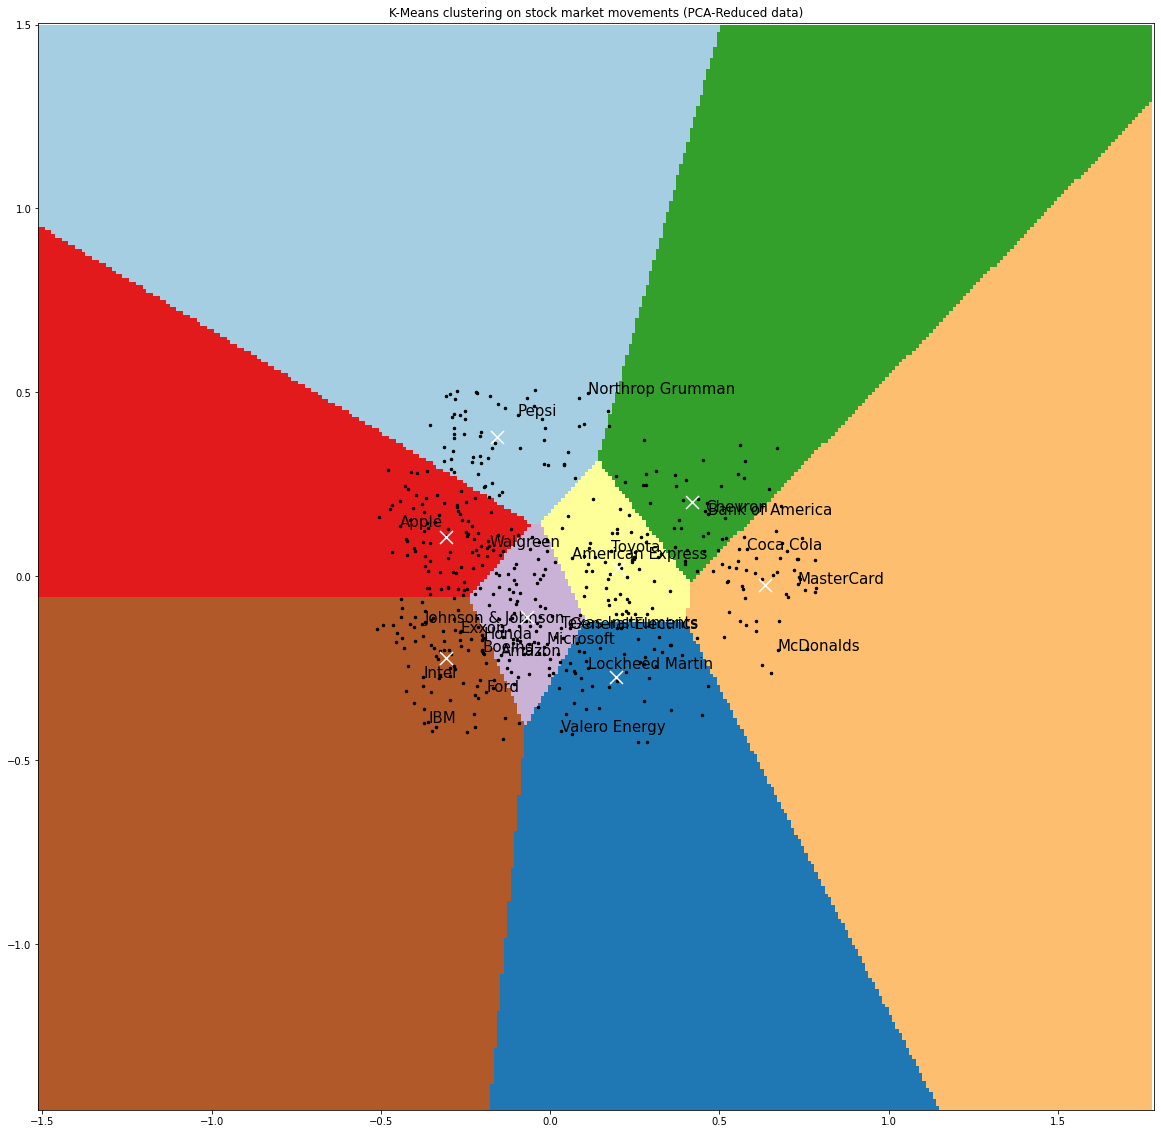

In [ ]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_returns)

# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(20,20))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
for i, label in enumerate(companies_dict.keys()):
    plt.annotate(label, (reduced_data[i,0], reduced_data[i,1]), fontsize=15)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

### K-means Clustering with Dynamic Time Warping

In [ ]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters = 5, metric = "dtw")
model.fit(return_stocks)
labels = model.predict(return_stocks)

stock_clusters = defaultdict(list)
for index in range(len(labels)):
    stock_clusters[labels[index]].append(return_stocks.index[index])

print(stock_clusters)
print(model.inertia_)

defaultdict(<class 'list'>, {3: ['A', 'AAP', 'ABT', 'ACN', 'ADM', 'ADP', 'AES', 'AJG', 'AKAM', 'ALLE', 'AMT', 'AON', 'AOS', 'ARE', 'AVB', 'AWK', 'AZO', 'BIIB', 'BLL', 'BR', 'BRO', 'BSX', 'BXP', 'C', 'CAT', 'CBOE', 'CCI', 'CHTR', 'CINF', 'CMCSA', 'CME', 'CNC', 'COO', 'COP', 'COST', 'CPT', 'CRL', 'CSX', 'CTAS', 'CTSH', 'CTVA', 'CVS', 'CVX', 'DE', 'DG', 'DHR', 'DIS', 'DLR', 'DOV', 'DRE', 'DVA', 'EA', 'EBAY', 'EFX', 'EMR', 'EQIX', 'EQR', 'ESS', 'EXR', 'FAST', 'FDS', 'FFIV', 'FISV', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRT', 'GE', 'GRMN', 'GWW', 'HAS', 'HCA', 'HES', 'ICE', 'IDXX', 'INCY', 'IQV', 'IT', 'J', 'JKHY', 'KIM', 'KMI', 'LH', 'LUMN', 'LYB', 'MAA', 'MCO', 'MKTX', 'MMC', 'MNST', 'MOH', 'MPC', 'MSCI', 'MSI', 'MTD', 'NDAQ', 'NEE', 'NEM', 'NUE', 'O', 'OKE', 'ORCL', 'ORLY', 'OTIS', 'PAYX', 'PEAK', 'PLD', 'PSA', 'PWR', 'PXD', 'REG', 'RMD', 'ROK', 'ROL', 'ROP', 'RSG', 'SBAC', 'SPG', 'SPGI', 'STE', 'SYK', 'SYY', 'T', 'TDY', 'TECH', 'TFX', 'TMO', 'TMUS', 'TYL', 'UDR', 'UHS', 'UNH', 'VRSK', 'VRSN', '

In [ ]:
companies_clusters = defaultdict(list)

for k,v in companies_dict.items():
    for j in stock_clusters:
        if v in stock_clusters[j]:
            companies_clusters[j].append(k)

companies_clusters

defaultdict(list,
            {0: ['IBM',
              'Johnson & Johnson',
              'Coca Cola',
              'Lockheed Martin',
              'McDonalds',
              'Northrop Grumman',
              'Pepsi',
              'Walgreen'],
             1: ['Apple',
              'American Express',
              'Bank of America',
              'Ford',
              'Intel',
              'MasterCard',
              'Microsoft',
              'Texas Instruments',
              'Valero Energy',
              'Exxon'],
             3: ['Chevron', 'General Electrics'],
             4: ['Amazon', 'Boeing']})